# The Running Nations

In [2]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as pyplot

In [5]:
df_marathon_ny = pd.read_excel("NY_Marathon_clean.xlsx")
df_marathon_ny.head(5)

,date,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
0,2016,Ghirmay Ghebreslassie,(ERI),02:07:51,Mary Keitany,(KEN),02:24:26,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Stanley Kipleting Biwott,(KEN),02:10:34,Mary Keitany,(KEN),02:24:25,29291.0,20944.0,50235.0,28899.0,20696.0,49595.0
2,2014,Wilson Kipsang,(KEN),02:10:59,Mary Keitany,(KEN),02:25:07,30324.0,20572.0,50896.0,30108.0,20422.0,50530.0
3,2013,Geoffrey Kiprono Mutai,(KEN),02:08:24,Priscah Jeptoo,(KEN),02:25:07,31002.0,19738.0,50740.0,30699.0,19567.0,50266.0
4,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_marathon_ny = df_marathon_ny.set_index('date')
df_marathon_ny.head(20)

,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
date,,,,,,,,,,,,
2016,Ghirmay Ghebreslassie,(ERI),02:07:51,Mary Keitany,(KEN),02:24:26,NaN,NaN,NaN,NaN,NaN,NaN
2015,Stanley Kipleting Biwott,(KEN),02:10:34,Mary Keitany,(KEN),02:24:25,29291.0,20944.0,50235.0,28899.0,20696.0,49595.0
2014,Wilson Kipsang,(KEN),02:10:59,Mary Keitany,(KEN),02:25:07,30324.0,20572.0,50896.0,30108.0,20422.0,50530.0
2013,Geoffrey Kiprono Mutai,(KEN),02:08:24,Priscah Jeptoo,(KEN),02:25:07,31002.0,19738.0,50740.0,30699.0,19567.0,50266.0
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,Geoffrey Kiprono Mutai,(KEN),02:05:06,Firehiwot Dado,(ETH),02:23:15,30200.0,17563.0,47763.0,30068.0,17272.0,47340.0
2010,Gebregziabher Gebremariam,(ETH),02:08:14,Edna Ngeringwony Kiplagat,(KEN),02:28:20,29097.0,16253.0,45350.0,28948.0,16155.0,45103.0
2009,Mebrahtom Keflezighi,(USA),02:09:15,Derartu Tulu,(ETH),02:28:52,28808.0,15369.0,44177.0,28485.0,15175.0,43660.0
2008,Marílson dos Santos,(BRA),02:08:43,Paula Radcliffe,(GBR),02:23:56,25669.0,13163.0,38832.0,25216.0,12880.0,38096.0


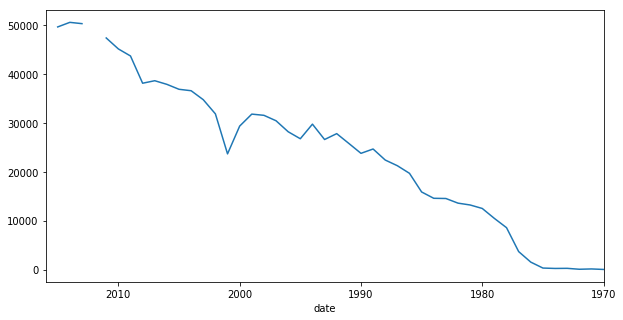

In [12]:
df_marathon_ny['total_finisher'].plot(figsize=(10,5))